# Elektrische Energie

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import holidays
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import locale
from distutils.spawn import find_executable


print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('holidays', holidays.__version__)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('locale', locale)

Versionen der verwendeten python-Module: 
numpy 1.20.3
matplotlib 3.4.2
pandas 1.3.2
datetime <module 'datetime' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/datetime.py'>
holidays 0.11.2
seaborn 0.11.2
plotly 5.1.0
sys 3.9.6 (default, Aug 18 2021, 19:38:01) 
[GCC 7.5.0]
os <module 'os' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/os.py'>
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/locale.py'>


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

### Funktionen definieren

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>LERNZIELE</b></div>
    <ul>
        <li> Kenngrößen für elektrische Energie verstehen </li>
        <li> mit Diagrammen und Formeln </li>
        <li> um Daten aus Messungen und Simulationen beurteilen zu können </li>
    </ul>
</div>

## Elektrische Leistung

### Gleichstromleistung

Fließt durch einen elektrischen Widerstand $R$ ein Strom $I$, so erwärmt er sich entsprechend der thermischen Leistung $P = I^2 \cdot R$. Dies geschieht, weil die elektrische Energie in thermische Energie umgewandelt wird. Mit dem Ohmschen Gesetz $R = U/I$ lassen sich dann verschiedene Formeln für die elektrische Leistung bei Gleichstrom $P_{\text{DC}}$  herleiten:

\begin{equation}
P_{\text{DC}}  = I^2 \cdot R = U\cdot I = \frac{U^2}{R}
\end{equation}

DC steht für *direct current* (englisch für Gleichstrom).

### Wechselstromleistung

#### Augenblicksleistung

Fließt durch einen elektrischen Widerstand $R$ ein zeitveränderlicher Strom $i(t)$, so liegt an dem Widerstand eine zeitveränderliche Spannung $u(t)$ an. In jedem Moment gilt für die Momentanleistung (auch Augenblicksleistung):

\begin{equation}
p(t) = u(t) \cdot i(t)
\end{equation}

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Führen Sie die folgenden Code-Zellen aus und verändern Sie dabei die angegebenen Parameter, um ein besseres Gefühl für dieses Thema zu bekommen.</div>

#### Wechselspannung

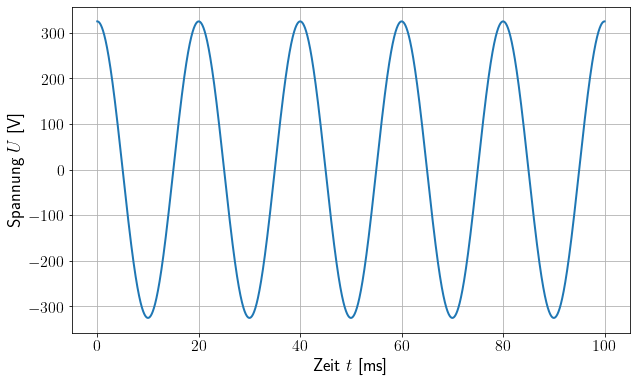

In [3]:
# Spannung im deutschen Stromnetz: Effektivwert 230 V
U = 230 # in Volt
udach = np.sqrt(2)*230 # Amplitude der Spannung
f = 50 # Frequenz in Hertz
# betrachteter Zeitraum
t = np.linspace(0,1e-3*100,5000) # 100 ms
# Spannungssignal ohne Störungen
u = udach*np.cos(2*np.pi*f*t)
# Diagramm
plt.plot(1e3*t,u)
plt.xlabel('Zeit $t$ [ms]')
plt.ylabel('Spannung $U$ [V]')
plt.grid()

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Was passiert, wenn Sie die Frequenz erhöhen? Ändern Sie den Wert in der Code-Zelle, drücken Sie Shift-Enter, um es auszuprobieren.
</div>

*Antwort: Wenn die Frequenz höher ist, dann ...*

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Warum schwingt die Spannung nicht zwischen plus und minus 230 V?
</div>

*Antwort: Die 230 V sind der Effektivwert der Spannung. Das bedeutet ...*

#### Zeitveränderliche Ströme

Nun definieren wir drei Ströme, wie sie gemessen werden könnten:
1. $i_a$ ein Gleichstrom
2. $i_b$ ein sinusförmiger Strom der Frequenz 50 Hz
3. $i_c$ ein Strom mit starkem Oberwellen-Anteil

In [4]:
# ia
Ia = 1 # in Ampère
ia = Ia*np.ones(len(t)) # zu jedem Zeitpunkt Ia
# ib
ib = Ia*np.sqrt(2)*np.cos(2*np.pi*f*t + np.pi/4)
# ic
ic = Ia*np.sqrt(2)*np.cos(2*np.pi*f*t + np.pi/4) + 0.5*Ia*np.sqrt(2)*np.cos(4*np.pi*f*t + np.pi/8) + 0.25*Ia*np.sqrt(2)*np.cos(8*np.pi*f*t + np.pi/16)

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Stellen Sie die drei Ströme in einem Diagramm dar. Nutzen Sie dafür das Code-Beispiel für die Spannung und ergänzen Sie einfach nach dem ersten plot-Befehl zwei weitere Zeilen mit den beiden weiteren plot-Befehle für die beiden anderen Ströme.
</div>

*Antwort: Es lässt sich beobachten, dass die Ströme $i_a$, $i_b$ und $i_c$ sich folgendermaßen verhalten ...*

#### Wirkleistung

Bei periodischen Signalen (Periode $T=1/f$ = Wiederholfrequenz) lässt sich die Wirkleistung als Mittelwert der Augenblicksleistung bestimmen:

\begin{equation}
P = \bar{p(t)} = \frac{1}{T}\int_0^T p(t)dt
\end{equation}

#### Zeitdiskrete Signale und zeitliche Auflösung

Diese Formel gilt für analoge Signale. Da wir in python mit zeitdiskreten Signalen arbeiten, d.h. Signalen, die  nur zu gewissen Zeitpunkten $t_i$ mit einem Wert hinterlegt sind, verändert sich die Formel zu:

\begin{equation}
P = \bar{p(t)} = \frac{1}{T}\int_0^T p(t)dt \approx \frac{1}{n}\sum_{t_i=t_1}^{t_i=t_n} p_i(t_i)
\end{equation}

In [5]:
# Mittelwert der Spannung
Umittel = np.mean(u)
print('Mittelwert der Spannung '+str(Umittel)+' V')

Mittelwert der Spannung 0.06505382386921264 V


<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Wie kommt der Mittelwert der Spannung zustande? Ist der Wert korrekt?
</div>

*Antwort: Der Wert ist nicht ganz korrekt, weil ... Wenn man ... verändert (wie?), kann man den Fehler reduzieren.*

#### Mittlere Ströme und Leistungen

Es gibt in python für sehr viele mathematische Operationen bereits vorbereitete Befehle. Hier ist der oben verwendete Befehl `np.mean()` sinnvoll. In der vorigen Code-Zeile ist er auf das Signal $u(t)$ angewendet zu sehen. Probieren Sie ihn auch für $i_a$, $i_b$ sowie $i_c$ und $p_a = u\cdot i_a$, $p_b$ und $p_c$ aus.

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Ermitteln Sie die Mittelwerte der Ströme und der Leistungen, die sich hier ergeben (insgesamt 6 Werte).
</div>

*Antwort: es fällt auf, dass...*

#### Leistungsfaktor

Die Wirkleistung entspricht der Leistung im Gleichstromkreis und wird in der Einheit Watt (W) angegeben. Die Wirkleistung **wirkt** und verursacht z. B. eine Temperaturerhöhung oder eine mechanische Kraft. Wenn die Effektivwerte von Strom $I$ und Spannung $U$ sowie die Phasenverschiebung $\varphi$ zwischen Spannung und Strom bekannt sind, so berechnet sich die Wirkleistung zu:

\begin{equation}
P = U\cdot I \cdot \cos\varphi
\end{equation}

#### Effektivwert

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Wie ist der Effektivwert eines Signals definiert?
</div>

*Antwort: Berechnet man die Leistung über einem Ohmschen Widerstand mit dem Effektivwert, so ...*

Die mathematische Formel für den Effektivwert (der auch Quadratmittelwert heißt, engl. *root-mean-square (RMS)*):

\begin{equation}
U_{eff} = U = \sqrt{\frac{1}{T}\int_0^T u^2(t) dt} \approx \sqrt{\frac{1}{nT}\sum_{t_i=t_1}^{t_i = t_n} u_i^2 (t_i)}
\end{equation}

Im Folgenden ist dies für die Spannung einmal als Code berechnet:

In [6]:
Ueff = np.sqrt(np.mean(u**2))
print('rückgerechneter Effektivwert der Spannung ' +str(Ueff) + ' V')

rückgerechneter Effektivwert der Spannung 230.02299885011502 V


<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Ermitteln Sie nun auch die Effektivwerte der drei Ströme und kommentieren Sie die Genauigkeit dieses Vorgehens. Berechnen Sie daraus auch die drei Wirkleistungen bei den drei Strömen und vergleichen Sie mit den oben ermittelten Werten.
</div>

*Antwort:...*

#### Blindleistung

Strom und Spannung sind nur bei rein ohmschen Verbrauchern in Phase. Treten kapazitive oder induktive Anteile hinzu, so wird ein Teil der Leistung im elektrischen bzw. magnetischen Feld zwischengespeichert  und zurück in den Stromkreis gespeist. Dieser Teil, der hin und her pendelt, heißt Blindleistung $Q$.

\begin{equation}
Q = U\cdot I \cdot \sin\varphi
\end{equation}

Die Blindleistung wird in der Einheit var (volt-ampere-reactive) angegeben.

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Ermitteln Sie nun auch die Blindleistungswerte bei den drei Strömen.
</div>

*Was beobachten Sie? Sind die ermittelten Werte sinnvoll?*

#### Verzerrungsblindleistung

Ist der Strom nicht rein sinusförmig wie bei $i_b$ mit der Grundfrequenz $f=50\text{ Hz}$, sondern enthält auch Anteile höherer Frequenzen wie $i_c$, so tragen die Leitungen nicht nur die Feldblindleistung $Q$, sondern auch die Verzerrungsblindleistung $D$, da die höherfrequenten Ströme mit der Spannung nicht in Phase sein können und daher keine Wirkleistung erbringen können. Die Scheinleistung $S$ besteht dann aus

\begin{equation}
S = \sqrt{P^2+Q^2+D^2}\label{eq:reactivepower}
\end{equation}

Die Scheinleistung wird zur Unterscheidung in VA (Volt-Ampere) angegeben.

Ein beliebiger periodischer (d.h. sich wiederholender) Stromverlauf kann als Summe von Sinusfunktionen verschiedener Frequenz dargestellt werden.

\begin{equation}
i(t) = I_0 + \sum_{n=1}^\infty \hat{i_n} \cdot \cos(n\cdot \omega t + \varphi_n)
\end{equation}

In dieser Gleichung ist $I_0$ der Gleichanteil (Offset), $\hat{i_n}$ die Amplitude des Sinusanteils der Frequenz $f_n = n\cdot f$, $\omega=2\pi f$ die Kreisfrequenz und $\varphi_n$ die Phase des Sinusanteils der Frequenz $f_n$.

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Wie groß ist der Effektivwert eines Sinussignals mit nur einer Frequenz $f$ als Funktion der Amplitude $\hat{i_n}$?
</div>

*Antwort: $I_n = ...$*

Um den gesamten Effektivwert des Stromes $i$ zu berechnen, kann man entweder die obige Formel für den quadratischen Mittelwert verwenden, oder die geometrische Summe der einzelnen Effektivwerte heranziehen.

\begin{equation}
I^2 = I_0^2 + I_1^2 + I_2^2 + I_3^2 + ... = I_0^2 + \sum_{n=1}^\infty I_n^2
\end{equation}

Die Scheinleistung berechnet sich aus $S = U\cdot I$. Für die Wirkleistung gilt jedoch, dass nur der grundfrequente Strom einen Beitrag liefert:

\begin{equation}
P = U \cdot I_1 \cdot \cos\varphi_1
\end{equation}

Für diesen allgemeineren Fall ist der Leistungsfaktor $\lambda$ definiert aus messbaren Größen:

\begin{equation}
\lambda = \frac{P}{S}
\end{equation}

Es ergibt sich für die Grundschwingungsblindleistung (Feldblindleistung) $Q$:

\begin{equation}
Q = U\cdot I_1 \cdot \sin\varphi_1 
\end{equation}

Die Verzerrungsblindleistung $D$ ist:

\begin{equation}
D = \sqrt{U^2\cdot (I_0^2 + I_2^2 + I_3^2 + ...)}
\end{equation}

Der Grundschwingungsleistungsfaktor $\lambda_1$ ist zu unterscheiden vom gesamten Leistungsfaktor $\lambda$:

\begin{equation}
\lambda_1 = \frac{\vert P \vert}{S_1} = \cos\varphi_1
\end{equation}

\begin{equation}
\lambda = \frac{\vert P \vert}{S} \leq \cos\varphi_1
\end{equation}

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Ermitteln Sie nun die Wirkleistung beim Strom  𝑖𝑐 . Ermitteln Sie ebenfalls die Feldblindleistung  𝑄  und die Verzerrungsblindleistung  𝐷  sowie den gesamten Leistungsfaktor  𝜆  und den Grundschwingungsleistungsfaktor  𝜆1 .
</div>

Das folgende Diagramm stellt die verschiedenen Leistungen für einen rein sinusförmigen Verbraucher mit Stromverlauf $i_b$ dar.

<AxesSubplot:xlabel='t [ms]'>

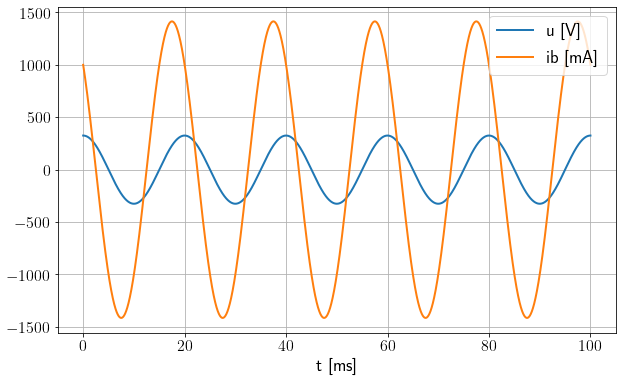

In [7]:
data = np.c_[1e3*t,u,1e3*ib]
uidf = pd.DataFrame(data = data, columns = ['t [ms]','u [V]', 'ib [mA]'])
uidf.plot(x = 't [ms]', grid = True)

Aus diesen Größen lassen sich die Leistungen bestimmen:

<AxesSubplot:xlabel='t [ms]'>

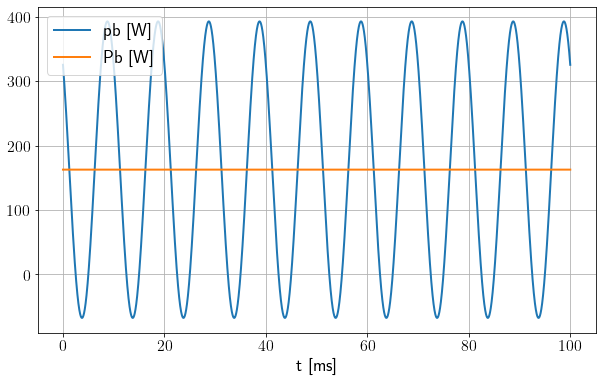

In [8]:
uidf['pb [W]'] = uidf['u [V]']*uidf['ib [mA]']*1e-3
uidf['Pb [W]'] = uidf['pb [W]'].mean()
uidf.plot(x = 't [ms]', y = ['pb [W]', 'Pb [W]'], grid = True)

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Stellen Sie nun ebenso den Strom $i_c$ mit der Spannung $u$ sowie die Leistung $p_c$ und $P_c$ dar. Was fällt auf?
</div>

*Antwort: Es fällt auf, dass ...*

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Welche Bedeutung für die Energieeffizienz haben Feldblindleistung und Verzerrungsblindleistung?
</div>

*Antwort: ...*

#### Scheitelfaktor

Als weitere Größe zur Beschreibung von Signalen $x(t)$ dient der Scheitelfaktor (engl. Crest Factor) $k_S$:

\begin{equation}
k_S = \frac{\vert x_{max} \vert}{X_{eff}}
\end{equation}

In dieser Gleichung ist $\vert x_{max}\vert$ der betragsmäßige Maximalwert des Signals und $X_{eff}$ der Effektivwert.

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Ermitteln Sie den Scheitelfaktor für die Ströme $i_a$, $i_b$ und $i_c$.
</div>

*Antwort: $k_{S,a}=...$, $k_{S,b}=...$, $k_{S,c}=...$*

## Elektrische Energie

### Lastprofil: zeitlich veränderliche Wirkleistung

Die elektrische Arbeit, die verrichtet wird, wenn über einen gewissen Zeitraum $\Delta t = t_2 - t_1$ ein Wirkleistungsprofil $P(t)$ verbraucht oder erzeugt wird, ist:

\begin{equation}
W_{wirk} (\Delta t) = \frac{1}{\Delta t}\cdot\int_{t = t_1}^{t= t_2} P(t) dt \approx \frac{1}{\Delta t} \cdot \sum_{k=k_{t_1}}^{k=k_{t_2}} P(k_{t_k}) 
\end{equation}

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Warum könnte sich die Wirkleistung über der Zeit verändern? Nennen Sie fünf verschiedene Möglichkeiten bei konkreten Geräten. Kann die Wirkleistung auch negativ werden?
</div>

*Antwort: Die Wirkleistungsaufnahme ändert sich über der Zeit, wenn man folgendes tut:*
- Gerät ...: ...
- Gerät ...: ...
- Gerät ...: ...
- Gerät ...: ...
- Gerät ...: ...

Wir erzeugen nun ein sehr simples zeitlich variables Lastprofil für die Wirkleistungsaufnahme eines fiktiven Gerätes.

<AxesSubplot:xlabel='t [s]'>

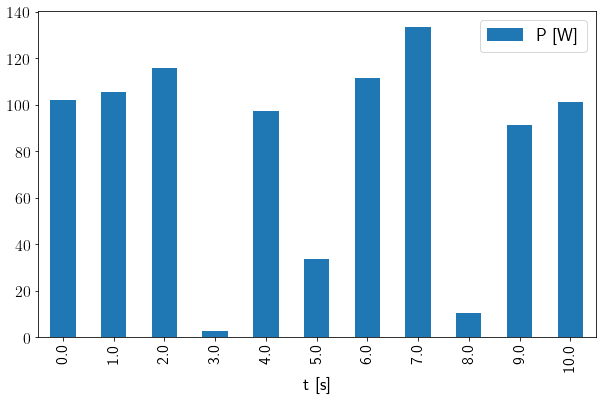

In [9]:
# neuer Zeitvektor
tx = np.linspace(0,10,11) # in Sekunden
# Wirkleistungsprofil: Zufallswerte
Px = 150*np.random.rand(len(tx))
data = np.c_[tx,Px]
# Dataframe
loadprofile = pd.DataFrame(data = data, columns = ['t [s]','P [W]'])
loadprofile.plot.bar(x = 't [s]')

Nun können wir mit diesem (sehr kurzen) Lastprofil einige Dinge berechnen: 
- die mittlere Wirkleistung mit den Befehlen `np.mean()` oder `pd.DataFrame.mean()`
- den Energieverbrauch mit den Befehlen `np.cumsum()` oder `pd.DataFrame.sum()`

In [10]:
Pxmittel = np.mean(Px)
print('die mittlere Wirkleistung, berechnet mit numpy, beträgt '+str(Pxmittel)+' W')

die mittlere Wirkleistung, berechnet mit numpy, beträgt 82.27141930649621 W


In [11]:
Pxmittel2 = loadprofile['P [W]'].mean()
print('die mittlere Wirkleistung, berechnet mit pandas, beträgt '+str(Pxmittel2)+' W')

die mittlere Wirkleistung, berechnet mit pandas, beträgt 82.27141930649621 W


Offenbar rechnen `numpy` und `pandas` gleich genau, es unterscheidet sich lediglich die Syntax.

In [12]:
Wx = np.cumsum(Px)
print('die verbrauchte Energie, berechnet mit numpy, beträgt '+str(Wx[-1])+' Ws')

die verbrauchte Energie, berechnet mit numpy, beträgt 904.9856123714584 Ws


In [13]:
Wx2 = loadprofile['P [W]'].sum()
print('die verbrauchte Energie, berechnet mit pandas, beträgt '+str(Wx[-1])+' Ws')

die verbrauchte Energie, berechnet mit pandas, beträgt 904.9856123714584 Ws


<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Wie viele Nachkommastellen machen Sinn für diese Angaben? Nutzen Sie den Befehl np.round(), um die Werte mit weniger Nachkommastellen einfacher lesbar darzustellen.
</div>

*Antwort: Die sinnvolle Anzahl der Nachkommastellen ist ..., weil ... Mehr Nachkommastellen sind nur sinnvoll, wenn man ...*

## Literatur

```{bibliography}
:filter: docname in docnames
```